# Exercises - COVID Analysis

## Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from IPython.display import set_matplotlib_formats
import plotly.express as px

## Import Data

In [8]:
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [9]:
cases_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


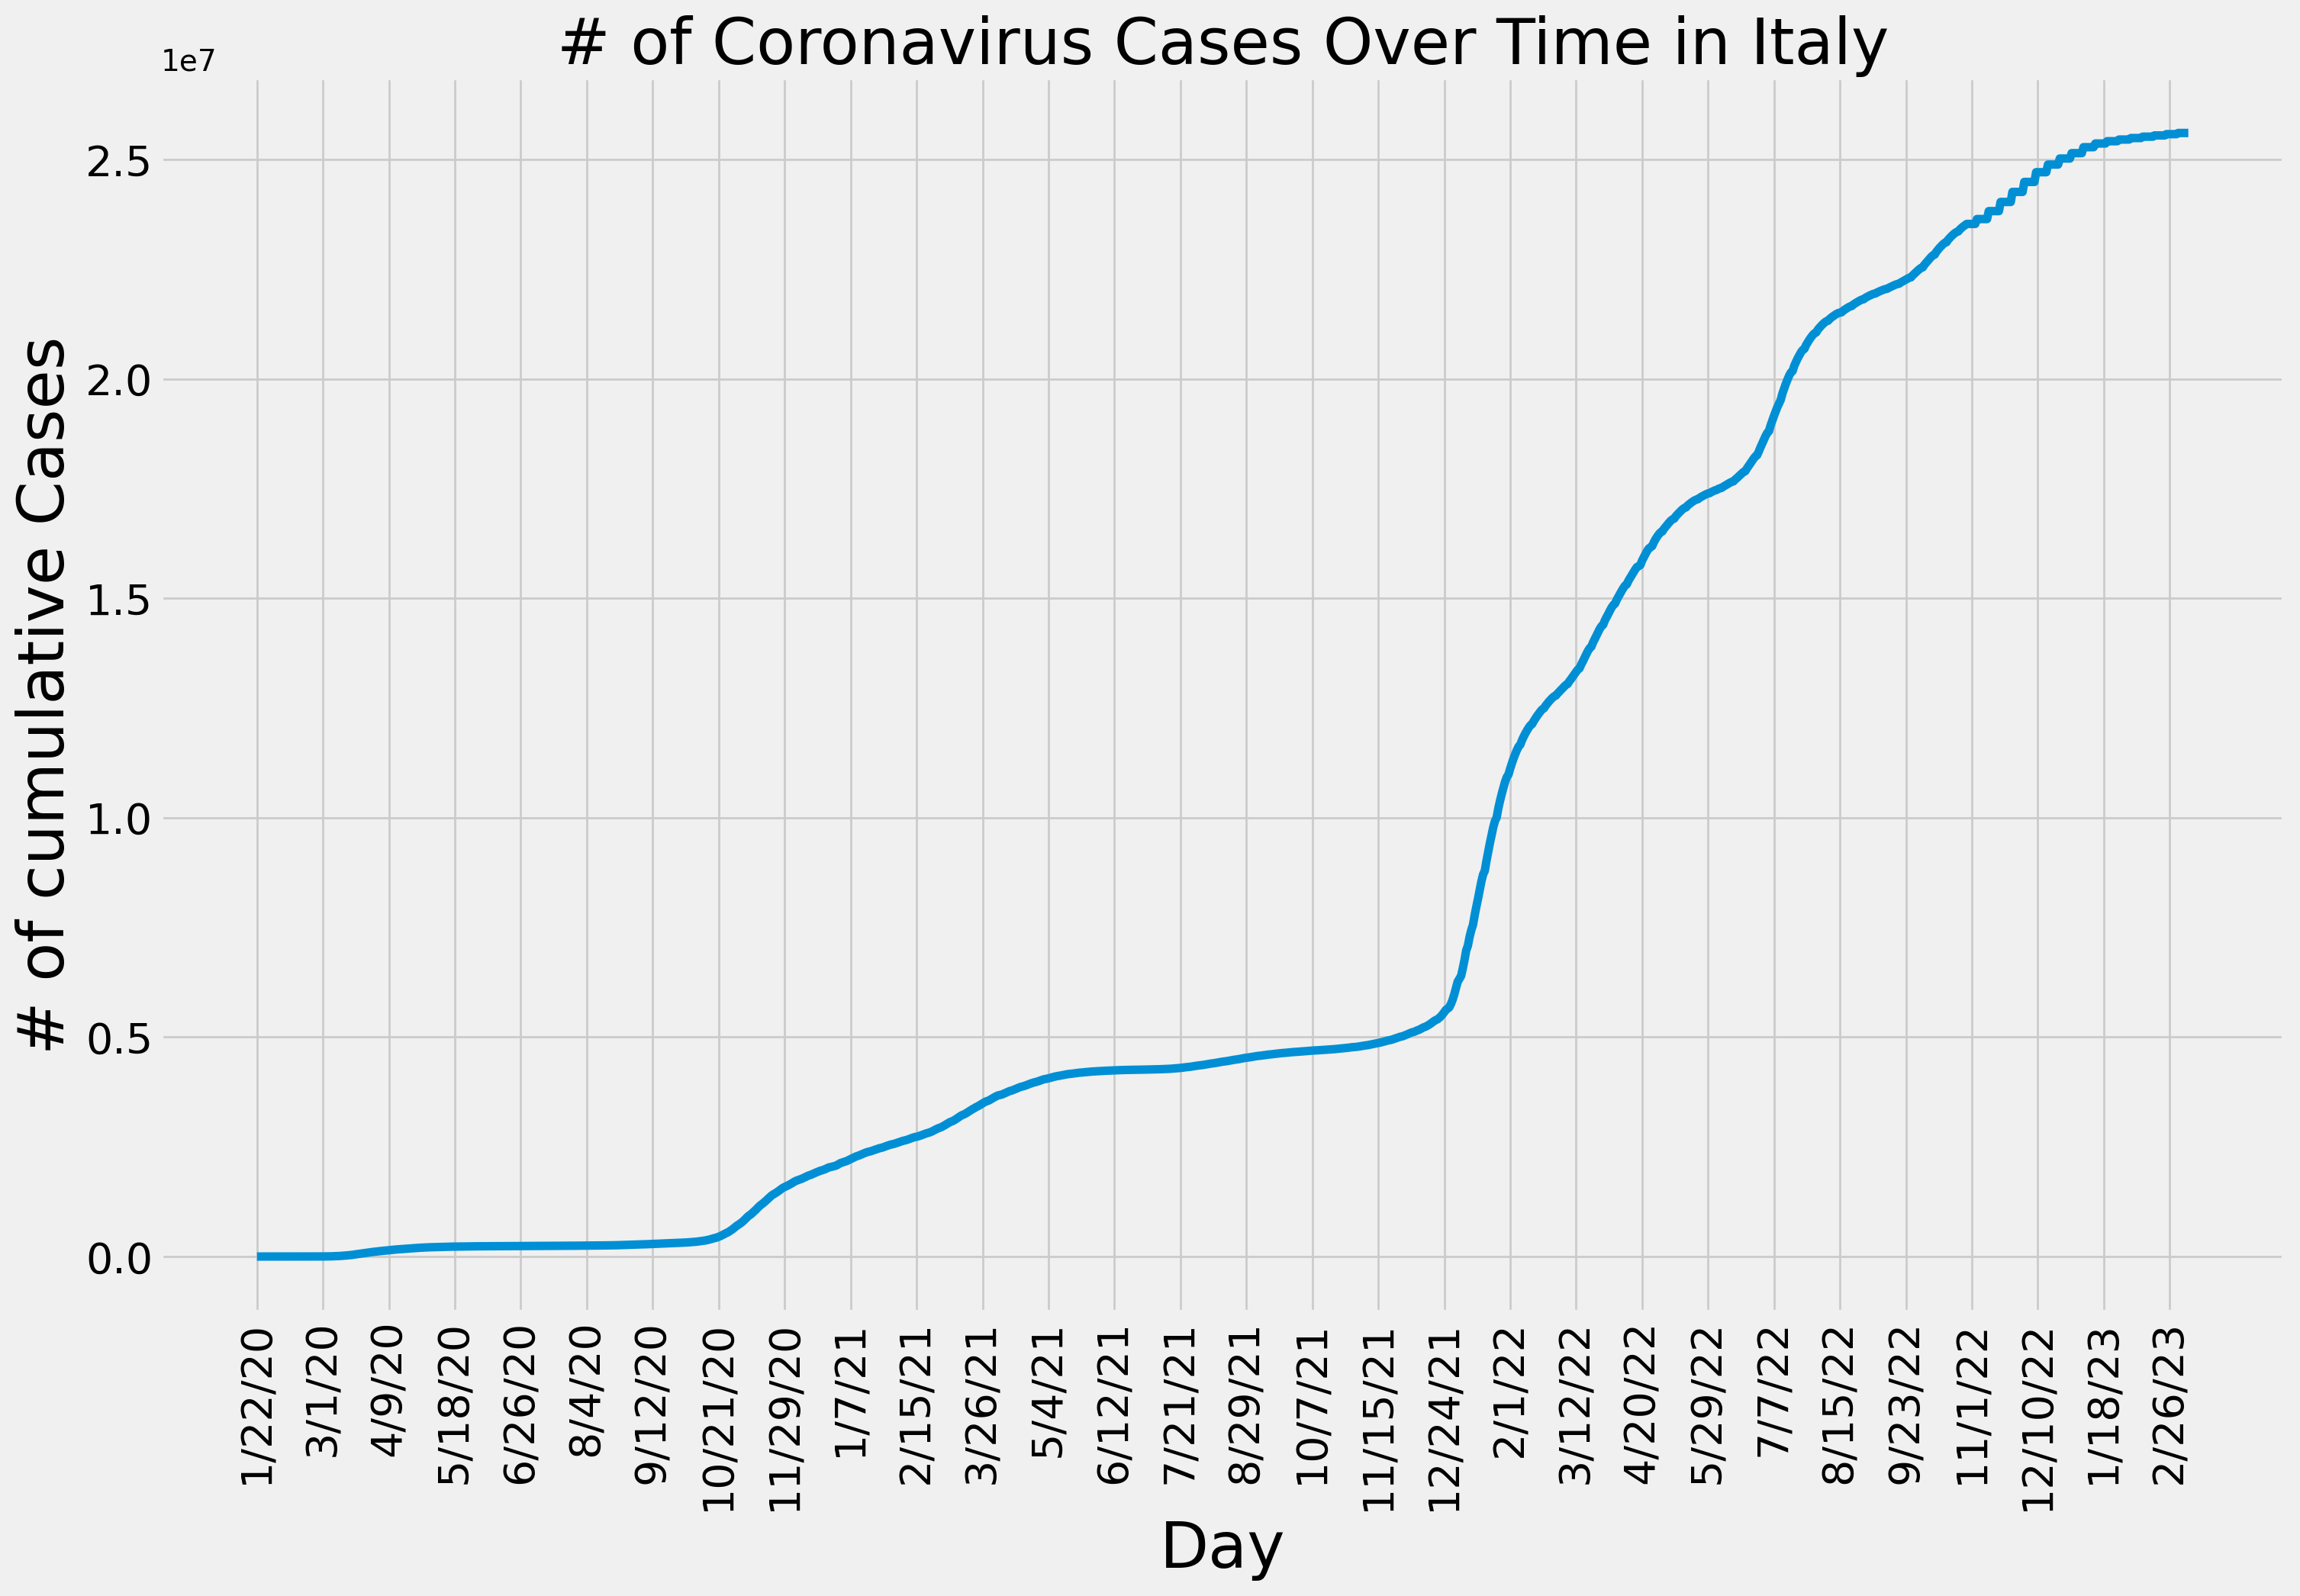

In [20]:
plt.style.use('fivethirtyeight')
%matplotlib inline
country = 'Italy' # select the country
cases_country = cases_df[cases_df['Country/Region'] == country].copy()
cases_country_complete = cases_country.copy()
cases_country = cases_country[cases_country.keys()[4:]]
plt.figure(figsize=(16, 10))
plt.plot(cases_country.keys(), cases_country.iloc[0])
plt.title('# of Coronavirus Cases Over Time in ' + country, size=30)
plt.xlabel('Day', size=30)
plt.ylabel('# of cumulative Cases', size=30)
plt.xticks(cases_country.keys(), size=20, rotation='vertical')
plt.locator_params(axis='x', nbins=30)
plt.yticks(size=20, rotation='horizontal')
plt.show()

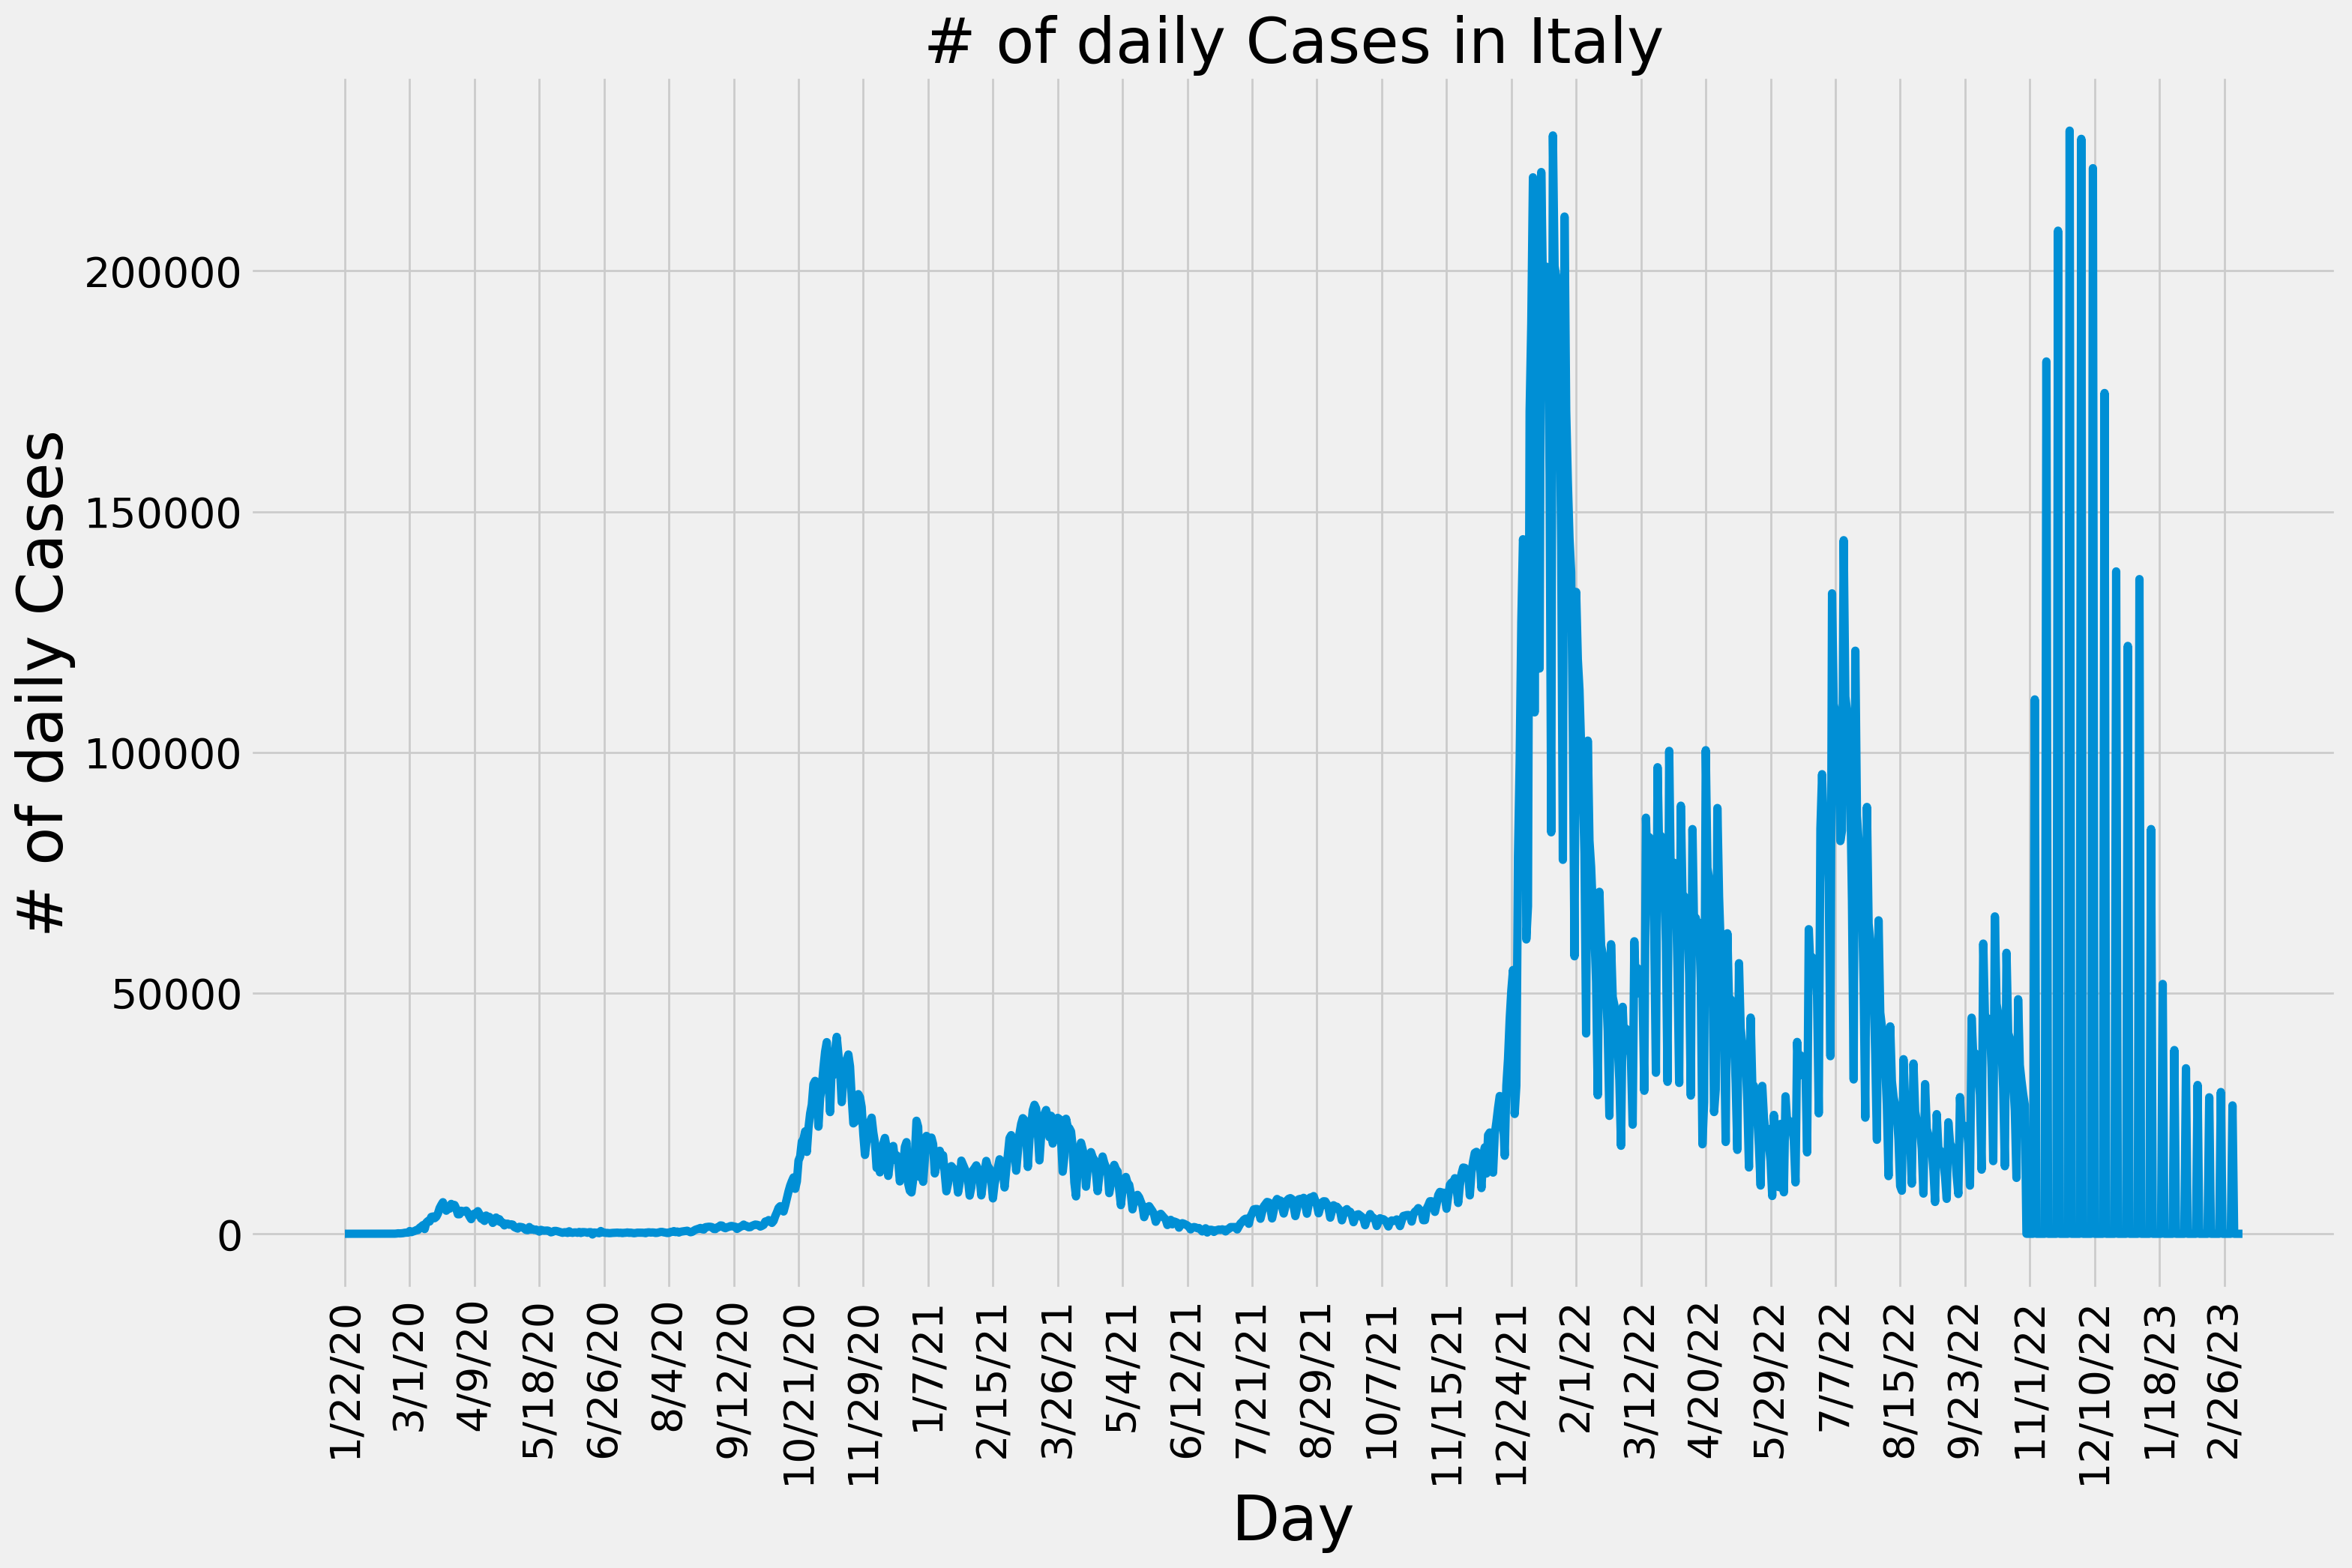

In [21]:
cases_country_dif = []
cases_country_dif.append(cases_country[cases_country.keys()[0]].iloc[0])

for j in range(1,len(cases_country.iloc[0])):
    cases_country_dif.append(cases_country.iloc[0][j] - cases_country.iloc[0][j-1])

plt.figure(figsize=(16, 10))
plt.plot(cases_country.keys(), cases_country_dif)
plt.title('# of daily Cases in ' + country, size=30)
plt.xlabel('Day', size=30)
plt.ylabel('# of daily Cases', size=30)
plt.xticks(cases_country.keys(), size=20, rotation='vertical')
plt.locator_params(axis='x', nbins=30)
plt.yticks(size=20, rotation='horizontal')
plt.show()

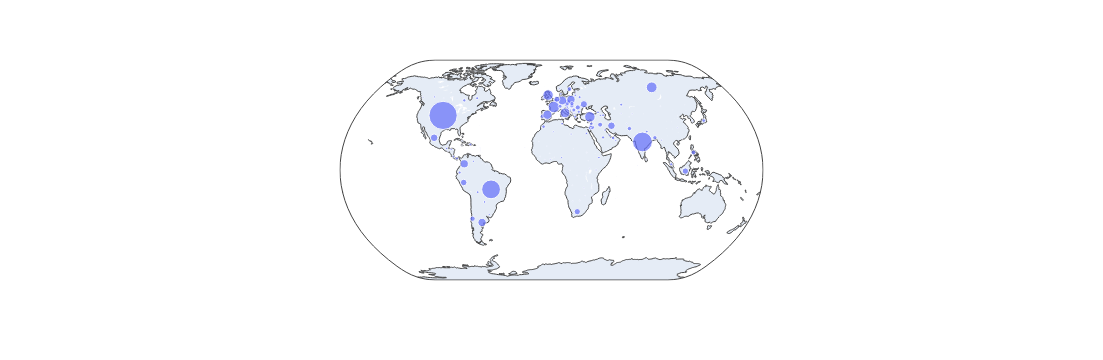

In [22]:
t = '4/20/21'
fig = px.scatter_geo(cases_df[[t, 'Lat', 'Long']], lon = 'Long', lat = 'Lat', size= t, projection="natural earth")
fig.show()